# Project Overview

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Business Case/Problem

## Data Description

## Data Load

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Features to remove: 
- 'yr_renovated': large number of missing data.

## Split Data into Training and Test set

In [34]:
target = df['price']
features = df.drop(['price'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=42)
y_train.head()

753      699800.0
1418    1700000.0
8178     258000.0
2254     245000.0
4063     373000.0
Name: price, dtype: float64

## Data Cleaning

Let's review columns to see which ones make the most sense to keep.

In [37]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
columns_to_keep = ['bedrooms', 
                   'bathrooms', 
                   'sqft_living', 
                   'sqft_lot', 
                   'floors', 
                   'condition',
                  'grade',
                  'sqft_above',
                  'sqft_basement',
                  'yr_built',
                  'zipcode'
                  ]

In [8]:
def filter_columns(df):
    columns_to_keep = ['bedrooms', 
                   'bathrooms', 
                   'sqft_living', 
                   'sqft_lot', 
                   'floors', 
                   'condition',
                  'grade',
                  'sqft_above',
                  'yr_built',
                  'zipcode'
                  ]
    return df[columns_to_keep]

In [51]:
df_filtered = filter_columns(x_train)
df_filtered.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode
753,2,2.50,2380,6600,1.0,3,8,2380,2010,98053
1418,4,3.75,3190,17186,2.0,3,10,3190,1999,98178
8178,3,2.50,1730,6930,2.0,3,8,1730,1994,98003
2254,4,2.00,1870,8750,1.0,3,7,1870,1977,98022
4063,8,3.00,2850,12714,1.0,3,7,2850,1959,98055


In [64]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 753 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15117 non-null  int64  
 1   bathrooms    15117 non-null  float64
 2   sqft_living  15117 non-null  int64  
 3   sqft_lot     15117 non-null  int64  
 4   floors       15117 non-null  float64
 5   condition    15117 non-null  int64  
 6   grade        15117 non-null  int64  
 7   sqft_above   15117 non-null  int64  
 8   yr_built     15117 non-null  int64  
 9   zipcode      15117 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.3 MB


Missing data from 'waterfront' column will need to be addressed.

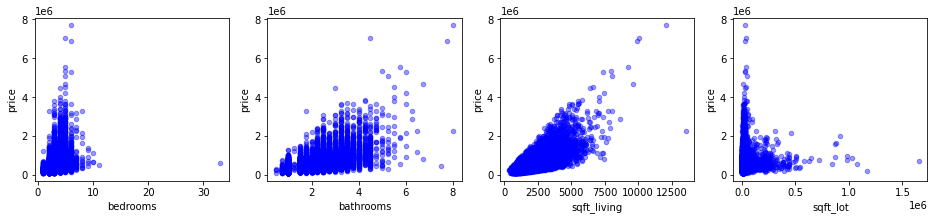

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 
                     'bathrooms',
                     'sqft_living',
                     'sqft_lot', 
                     ], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

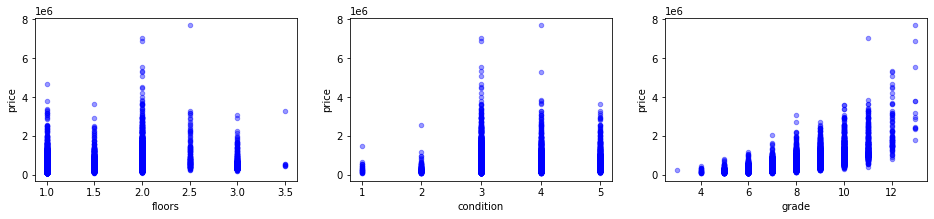

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['floors',
                     'condition',
                     'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

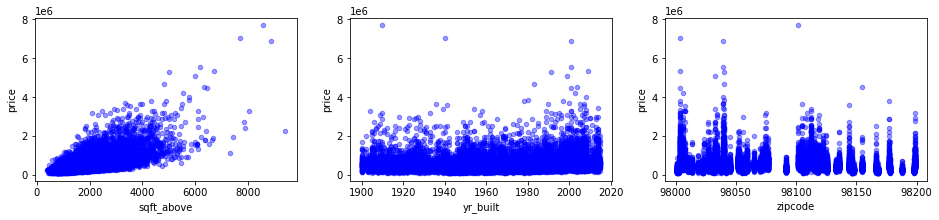

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_above',
                    'yr_built',
                    'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

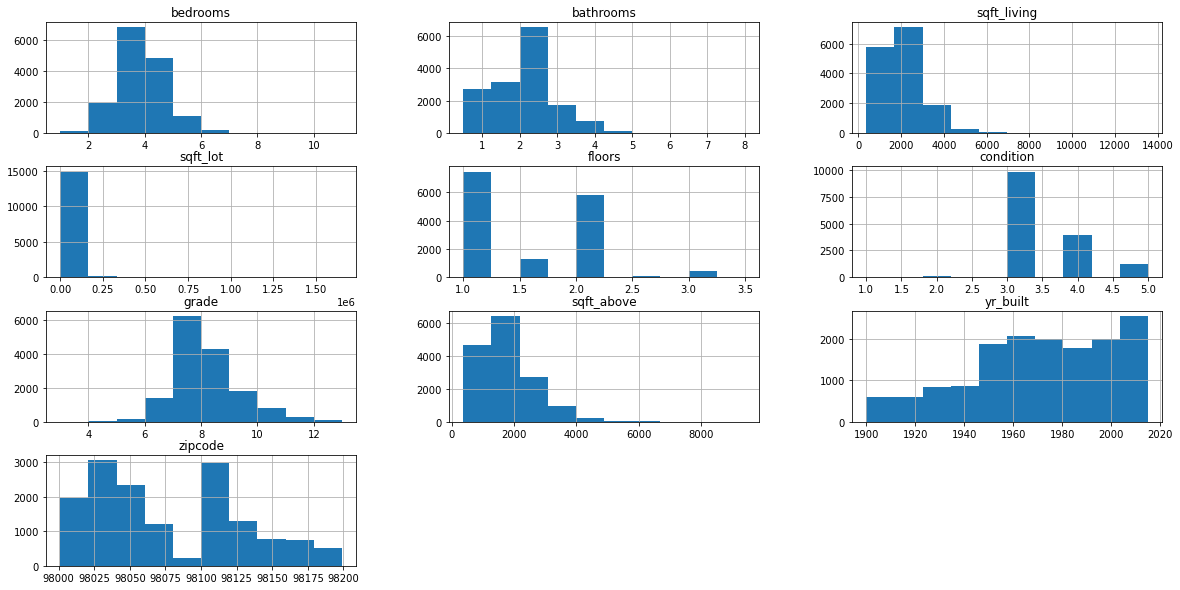

In [52]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_filtered.hist(ax = ax);

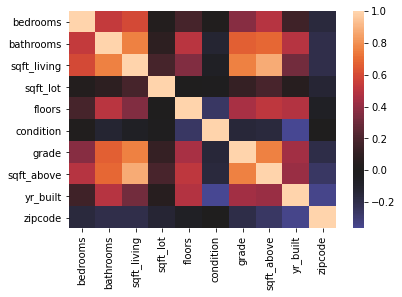

In [16]:
sns.heatmap(df_filtered.corr(), center=0);

In [28]:
df_filtered['yr_built'] = df_filtered['yr_built'].astype('str')
df_filtered['zipcode'] = df_filtered['zipcode'].astype('str')

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 753 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15117 non-null  int64  
 1   bathrooms    15117 non-null  float64
 2   sqft_living  15117 non-null  int64  
 3   sqft_lot     15117 non-null  int64  
 4   floors       15117 non-null  float64
 5   condition    15117 non-null  int64  
 6   grade        15117 non-null  int64  
 7   sqft_above   15117 non-null  int64  
 8   yr_built     15117 non-null  object 
 9   zipcode      15117 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [19]:
df_filtered.zipcode.unique()

array(['98053', '98178', '98003', '98022', '98055', '98103', '98155',
       '98065', '98008', '98001', '98040', '98126', '98052', '98023',
       '98107', '98075', '98005', '98092', '98112', '98059', '98133',
       '98102', '98031', '98122', '98168', '98117', '98146', '98188',
       '98115', '98027', '98006', '98136', '98028', '98105', '98029',
       '98038', '98045', '98024', '98166', '98072', '98074', '98108',
       '98144', '98125', '98004', '98106', '98019', '98198', '98118',
       '98034', '98109', '98058', '98002', '98033', '98199', '98042',
       '98010', '98077', '98056', '98007', '98070', '98030', '98119',
       '98116', '98014', '98177', '98148', '98011', '98032', '98039'],
      dtype=object)

In [49]:
df_filtered.yr_built.unique()

array(['1955', '1951', '1933', '1965', '1987', '2001', '1995', '1963',
       '1960', '2003', '1942', '1927', '1977', '1900', '1979', '1994',
       '1916', '1921', '1969', '1947', '1968', '1985', '1941', '1915',
       '1909', '1948', '2005', '1929', '1981', '1930', '1904', '1996',
       '2000', '1984', '2014', '1922', '1959', '1966', '1953', '1950',
       '2008', '1991', '1954', '1973', '1925', '1989', '1972', '1986',
       '1956', '2002', '1992', '1964', '1952', '1961', '2006', '1988',
       '1962', '1939', '1946', '1967', '1975', '1980', '1910', '1983',
       '1978', '1905', '1971', '2010', '1945', '1924', '1990', '1914',
       '1926', '2004', '1923', '2007', '1976', '1949', '1999', '1901',
       '1993', '1920', '1997', '1943', '1957', '1940', '1918', '1928',
       '1974', '1911', '1936', '1937', '1982', '1908', '1931', '1998',
       '1913', '2013', '1907', '1958', '2012', '1912', '2011', '1917',
       '1932', '1944', '1902', '2009', '1903', '1970', '2015', '1934',
      

In [20]:
zip_dummies = pd.get_dummies(df_filtered['zipcode'], prefix='zip', drop_first=True)
yr_dummies = pd.get_dummies(df_filtered['yr_built'], prefix='yr', drop_first=True)

In [21]:
df_dummies = df_filtered.drop(['zipcode','yr_built'], axis=1)

In [24]:
df_dummies = pd.concat([df_filtered, zip_dummies, yr_dummies], axis=1)
df_dummies.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
753,2,2.50,2380,6600,1.0,3,8,2380,2010,98053,...,0,0,0,0,1,0,0,0,0,0
1418,4,3.75,3190,17186,2.0,3,10,3190,1999,98178,...,0,0,0,0,0,0,0,0,0,0
8178,3,2.50,1730,6930,2.0,3,8,1730,1994,98003,...,0,0,0,0,0,0,0,0,0,0
2254,4,2.00,1870,8750,1.0,3,7,1870,1977,98022,...,0,0,0,0,0,0,0,0,0,0
4063,8,3.00,2850,12714,1.0,3,7,2850,1959,98055,...,0,0,0,0,0,0,0,0,0,0


## Model A

In [35]:
data_fin = pd.DataFrame([])
price = y_train
bedrooms = x_train['bedrooms']
bathrooms = x_train['bathrooms']
sqft_living = x_train['sqft_living']                

In [36]:
simple_model_ols = pd.concat([price, bedrooms, bathrooms, sqft_living, zip_dummies, yr_dummies], axis=1)
simple_model_ols.head()

,price,bedrooms,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
753,699800.0,2,2.50,2380,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1418,1700000.0,4,3.75,3190,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8178,258000.0,3,2.50,1730,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,245000.0,4,2.00,1870,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4063,373000.0,8,3.00,2850,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [41]:
outcome = 'price'
predictors = simple_model_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [42]:
model = ols(formula=formula, data=simple_model_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     235.1
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:19:42   Log-Likelihood:            -2.0484e+05
No. Observations:               15117   AIC:                         4.101e+05
Df Residuals:                   14929   BIC:                         4.115e+05
Df Model:                         187                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.467e+04   2.81e+04     -1.946      0.052    -1.1e+05     403.211
bedrooms    -4.949e+04   2229.527    -22.197      0.000   -5.39e+04   -4.51e+04
bathrooms    3.333e+04   3658.167      9.110      0.000    2.62e+04    4.05e+04
sqft_living   267.2721      2.912     91.793      0.000     261.565     272.979
zip_98002    1.768e+04   2.01e+04      0.879      0.380   -2.18e+04    5.71e+04
zip_98003    1.621e+04   1.79e+04      0.907      0.365   -1.88e+04    5.12e+04
zip_98004     7.76e+05   1.76e+04     44.101      0.000    7.41e+05     8.1e+05
zip_98005     3.41e+05    2.1e+04     16.258      0.000       3e+05    3.82e+05
zip_98006    3.252e+05   1.58e+04     20.591      0.000    2.94e+05    3.56e+05
zip_98007    2.817e+05   2.25e+04     12.514      0.000    2.38e+05    3.26e+05
zip_98008    3.202e+05    1.8e+04     17.790      0.000    2.85e+05    3.55e+05
zip_98010    8.544e+04   2.43e+04      3.511      0.000    3.77e+04    1.33e+05
zip_98011    1.167e+05   2.01e+04      5.820      0.000    7.74e+04    1.56e+05
zip_98014    9.381e+04   2.27e+04      4.129      0.000    4.93e+04    1.38e+05
zip_98019    7.295e+04   2.02e+04      3.610      0.000    3.33e+04    1.13e+05
zip_98022    4.759e+04   1.92e+04      2.474      0.013    9879.396    8.53e+04
zip_98023   -6821.1172   1.54e+04     -0.443      0.658    -3.7e+04    2.34e+04
zip_98024    1.832e+05    2.7e+04      6.797      0.000     1.3e+05    2.36e+05
zip_98027    1.724e+05    1.6e+04     10.808      0.000    1.41e+05    2.04e+05
zip_98028    1.218e+05   1.79e+04      6.803      0.000    8.67e+04    1.57e+05
zip_98029    2.412e+05   1.74e+04     13.837      0.000    2.07e+05    2.75e+05
zip_98030    1.146e+04   1.86e+04      0.617      0.537   -2.49e+04    4.79e+04
zip_98031        2e+04   1.79e+04      1.118      0.264   -1.51e+04    5.51e+04
zip_98032    8516.4105   2.39e+04      0.357      0.721   -3.83e+04    5.53e+04
zip_98033    3.968e+05   1.61e+04     24.661      0.000    3.65e+05    4.28e+05
zip_98034    2.215e+05   1.52e+04     14.596      0.000    1.92e+05    2.51e+05
zip_98038    2.961e+04   1.51e+04      1.957      0.050     -47.225    5.93e+04
zip_98039    1.376e+06   3.21e+04     42.817      0.000    1.31e+06    1.44e+06
zip_98040    6.175e+05   1.81e+04     34.060      0.000    5.82e+05    6.53e+05
zip_98042    2.009e+04   1.53e+04      1.315      0.189   -9867.885    5.01e+04
zip_98045    1.046e+05   1.89e+04      5.529      0.000    6.75e+04    1.42e+05
zip_98052    2.494e+05    1.5e+04     16.669      0.000     2.2e+05    2.79e+05
zip_98053    2.075e+05   1.65e+04     12.557      0.000    1.75e+05     2.4e+05
zip_98055    4.624e+04   1.77e+04      2.608      0.009    1.15e+04     8.1e+04
zip_98056    1.167e+05   1.63e+04      7.171      0.000    8.48e+04    1.49e+05
zip_98058    5.036e+04   1.58e+04      3.17

## Feature Engineering

## Model Training

## Model Evaluation

## Conclusions/Summary